<a href="https://colab.research.google.com/github/gstripling00/conferences/blob/main/ODSC_23_predict_media_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network using Keras


## Introduction
Our use case is to build, train, and evaluate a prediction model for sales analysis.

In this model, we need to feed the advertising budget of TV, radio, and newspapers to the model and the model will forecast the possible sales.

## Dataset
The dataset being used for this chapter, the advertising_2023 dataset, is based on data taken from An Introduction to Statistical Learning with Applications in R by Daniela Witten, Gareth M. James, Trevor Hastie, and Robert Tibshirani (Springer, 2021). The advertising dataset captures the sales revenue generated from advertising (in thousands of units) for particular product advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

For this exercise, the dataset has been updated to include a digital variable and modified to show the impact of digital budgets on sales. The number of markets has been increased from 200 to 1,200. Thus, the data consists of the advertising budgets for four media channels (digital, TV, radio, and newspapers) and the overall sales in 1,200 different markets.

   
&nbsp;
&nbsp;

##### Features:
| Channel    | Description |
| --------   | ------- |
| Digital    | Advertising dollars spent on Internet   |
| TV         | Advertising dollars spent on TV    |
| Radio      | Advertising dollars spent on Radio   |

&nbsp;
&nbsp;


#### Target (Label): Sales budget


# Step 1: Data Preparation

### Import Libraries

In [2]:
# Import the necessary libraries

# For Data loading, Exploraotry Data Analysis, Graphing
import pandas as pd   # Pandas for data processing libraries
import numpy as np    # Numpy for mathematical functions

import matplotlib.pyplot as plt # Matplotlib for visualization tasks
import seaborn as sns # Seaborn for data visualization library based on matplotlib.
%matplotlib inline

import sklearn        # ML tasks
from sklearn.model_selection import train_test_split # Split the dataset
from sklearn.metrics import mean_squared_error  # Calculate Mean Squared Error

# Build the Network
from tensorflow import keras
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
from keras.layers import Dense


In [5]:

# Next, you read the dataset into a Pandas dataframe.

url = 'https://github.com/maabel0712/low-code-ai/blob/main/advertising_2023.csv?raw=true'
advertising_df= pd.read_csv(url,index_col=0)

In [ ]:
# Backup dataset
# Next, you read the dataset into a Pandas dataframe.

url = 'https://github.com/LinkedInLearning/artificial-intelligence-foundations-neural-networks-4381282/blob/main/Advertising_2023.csv?raw=true'
advertising_df= pd.read_csv(url,index_col=0)

In [6]:
# Pandas info() function is used to get a concise summary of the dataframe.
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [7]:
### Get summary of statistics of the data
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [10]:
#shape of dataframe - 1199 rows, five columns
advertising_df.shape

(1199, 5)

Let's check for any null values.

In [11]:
# The isnull() method is used to check and manage NULL values in a data frame.
advertising_df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!  

<Axes: >

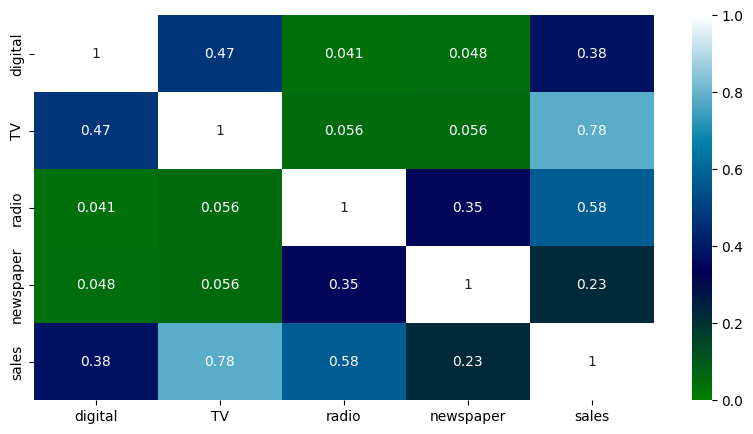

In [12]:
## Plot the heatmap so that the values are shown.

plt.figure(figsize=(10,5))
sns.heatmap(advertising_df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')


In [16]:
advertising_df.corr()

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


## Training a Linear Regression Model

Regression is a supervised machine learning process.  It is similar to classification, but rather than predicting a label, you try to predict a continuous value.   Linear regression defines the relationship between a target variable (y) and a set of predictive features (x).  Simply stated, If you need to predict a number, then use regression.

Let's now begin to train your regression model! You will need to first split up your data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. You will toss out the Address column because it only has text info that the linear regression model can't use.

#### Data Preprocessing

##### Split: X (features) and y (target)
Next, let's define the features and label.  Briefly, feature is input; label is output. This applies to both classification and regression problems.

In [27]:
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df['sales']

# print (X)
# print (y)

      digital     TV  radio  newspaper
1      345.15  156.0   37.8       69.2
2       66.75   46.0   39.3       45.1
3       25.80   18.3   45.9       69.3
4      227.25  145.1   41.3       58.5
5      271.20  165.2   10.8       58.4
...       ...    ...    ...        ...
1195    13.80  149.7   35.6        6.0
1196     8.10   38.2    3.7       13.8
1197     6.40   94.2    4.9        8.1
1196     8.10   38.2    3.7       13.8
1197     6.40   94.2    4.9        8.1

[1199 rows x 4 columns]


##### Scaling (Normalization)

In [29]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(X.values)

#What is the normalize function in keras?
# The normalize function just performs a regular normalization to improve performance:
# Normalization is a rescaling of the data from the original range so that all values
#are within the range of 0 and 1.

print(normalized_feature)



[[0.89211961 0.4032179  0.0977028  0.17886333]
 [0.66254734 0.45658693 0.39008405 0.44765371]
 [0.29009225 0.20576311 0.51609436 0.77920128]
 ...
 [0.06744611 0.99272247 0.05163843 0.08536149]
 [0.19480049 0.91868871 0.08898294 0.33188231]
 [0.06744611 0.99272247 0.05163843 0.08536149]]


##### Train - Test - Split

Now let's split the data into a training and test set.  Note:  Best pracices is to split into three - training, validation, and test set.

By default - It splits the given data into 75-25 ratio


In [30]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# If you don't specify the random_state in the code, then every time you run(execute) your code
# a new random value is generated and the train and test datasets would have different values each time.
# if a fixed value is assigned like random_state = 0 or 1 or 42 or any other integer then no
# matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

In [31]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape )

(719, 4) (480, 4) (719,) (480,)


# Step 2:  Build Network


#### Build and Train the Network

In [32]:
## Build Model (Building a three layer network - with one hidden layer)
model = Sequential()
model.add(Dense(4,input_dim=4, activation='relu'))                                                  # You don't have to specify input size.Just define the hidden layers
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='mse',metrics=['mse'])

#  Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                    epochs = 32)



Epoch 1/32
23/23 [==============================] - 1s 14ms/step - loss: 218.9383 - mse: 218.9383 - val_loss: 215.1455 - val_mse: 215.1455
Epoch 2/32
23/23 [==============================] - 0s 4ms/step - loss: 217.2647 - mse: 217.2647 - val_loss: 213.4982 - val_mse: 213.4982
Epoch 3/32
23/23 [==============================] - 0s 6ms/step - loss: 215.2658 - mse: 215.2658 - val_loss: 211.5203 - val_mse: 211.5203
Epoch 4/32
23/23 [==============================] - 0s 4ms/step - loss: 212.7569 - mse: 212.7569 - val_loss: 208.2651 - val_mse: 208.2651
Epoch 5/32
23/23 [==============================] - 0s 6ms/step - loss: 208.5577 - mse: 208.5577 - val_loss: 204.3864 - val_mse: 204.3864
Epoch 6/32
23/23 [==============================] - 0s 5ms/step - loss: 204.1907 - mse: 204.1907 - val_loss: 199.8867 - val_mse: 199.8867
Epoch 7/32
23/23 [==============================] - 0s 6ms/step - loss: 198.8181 - mse: 198.8181 - val_loss: 192.5697 - val_mse: 192.5697
Epoch 8/32
23/23 [===============

### Visualization

You can add more 'flavor' to the graph by making it bigger and adding labels and names, as shown below.

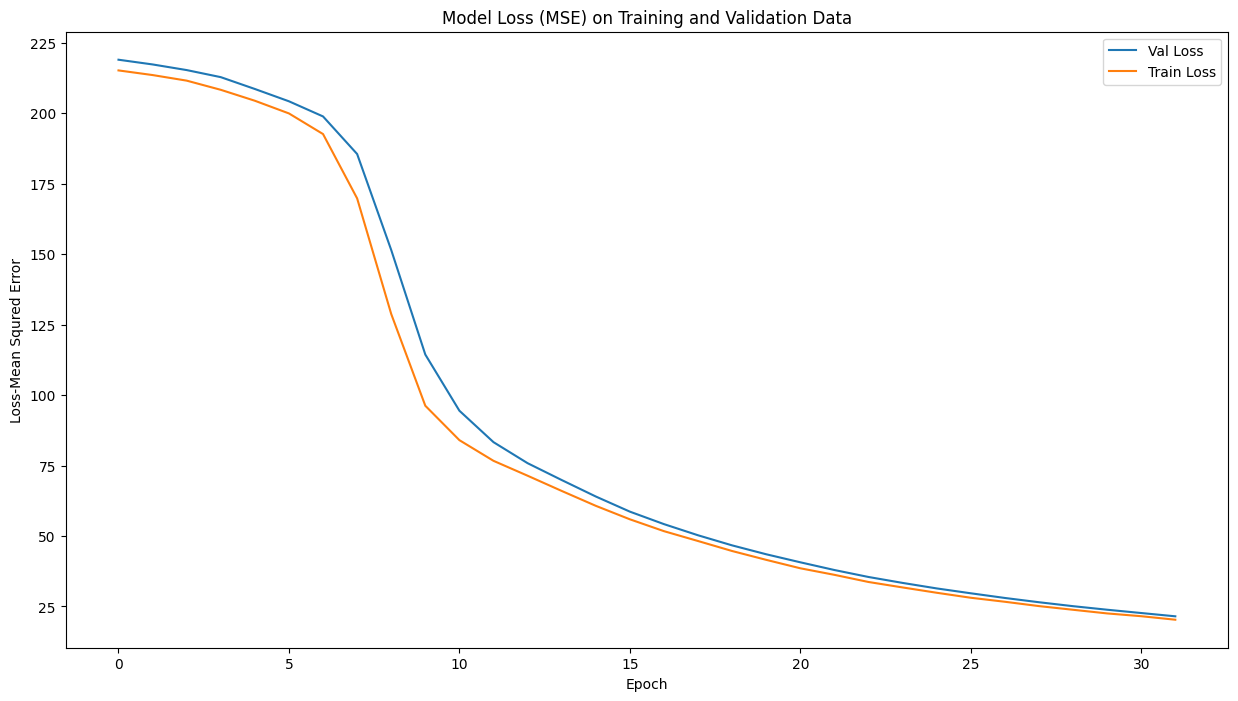

In [33]:
## Plot a graph of model loss # show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()

